# Regresión logística

##Fundamentos de la técnica
La regresión logística es un modelo que estima la probabilidad de que ocurra un evento, como votar o no votar, en función de un conjunto de datos determinado de variables independientes.

Este tipo de modelo estadístico  se utiliza comunmente para la clasificación y el análisis predictivo. Dado que el resultado es una probabilidad, la variable dependiente está limitada entre 0 y 1, es decir, la clase debe ser binaria.

#Modelo matemático

##1. Representación del modelo

El modelo calcula primero una combinación lineal:

###Ecuación lineal

$$
z = w_1 x_1 + w_2 x_2 + b
$$

Donde:

- $\ x_1 \$ = Peso  

- $\ x_2 \$ = Tamaño

- $\ w_1, w_2 \$ = Pesos del modelo  

- $\ b \$ = Sesgo o bias  

##2. Función Sigmoide

Queremos convertir el valor \( z \) en una probabilidad usando:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

El resultado es:

$$
\hat{y} = P(y = 1 \mid x)
$$

Donde $\hat{y} \$ es la probabilidad.



## 3. Regla de Decisión

El modelo decide así:

$$
\hat{y} \ge 0.5 \Rightarrow 1 \text{ (Naranja)}
$$

$$
\hat{y} < 0.5 \Rightarrow 0 \text{ (Manzana)}
$$


##3. Función de Pérdida (Log-Loss)

Para medir qué tan buena es la predicción, usamos:

$$
L = -\left[y\log(\hat{y}) + (1 - y)\log(1 - \hat{y})\right]
$$

Para todos los datos:

$$
J(w_1, w_2, b) = \frac{1}{m} \sum_{i=1}^m L_i
$$

donde:

- $\ m \$ = número de ejemplos del dataset.


##4. Derivadas del Modelo (Cálculo del Gradiente)

El modelo ajusta los parámetros usando **gradiente descendente**.

### Derivada respecto a $\ w_1 \$

$$
\frac{\partial J}{\partial w_1} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)}) x_1^{(i)}
$$

### Derivada respecto a $\ w_2 \$

$$
\frac{\partial J}{\partial w_2} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)}) x_2^{(i)}
$$

### Derivada respecto a $\ b \$

$$
\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})
$$


##5. Actualización de Parámetros (Gradiente Descendente)

El modelo ajusta sus parámetros así:

## 8.1. Para $\ w_1 \$ :

$$
w_1 := w_1 - \alpha \frac{\partial J}{\partial w_1}
$$

## 8.2. Para $\ w_2 \$:

$$
w_2 := w_2 - \alpha \frac{\partial J}{\partial w_2}
$$

## 8.3. Para $\ b \$:

$$
b := b - \alpha \frac{\partial J}{\partial b}
$$

Donde:

- $  \alpha $= learning rate o tasa de aprendizaje.

#PREPROCESAMIENTO

In [2]:
#IMPORTACION DE LIBRERIAS Y DATASET
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

df = pd.read_csv("/content/fruit_classificationPer.csv")


df.head()


,size (cm),avg_price (₹),fruit_name
0,10.2,37.8,1
1,5.4,80.2,0
2,9.8,37.1,1
3,9.0,37.6,1
4,9.3,36.5,1


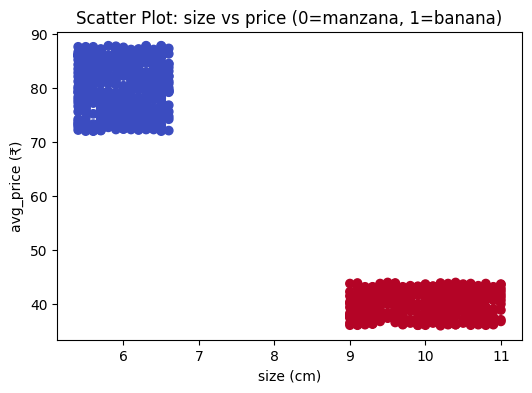

In [3]:
plt.figure(figsize=(6,4))
plt.scatter(df["size (cm)"], df["avg_price (₹)"], c=df["fruit_name"], cmap="coolwarm")
plt.xlabel("size (cm)")
plt.ylabel("avg_price (₹)")
plt.title("Scatter Plot: size vs price (0=manzana, 1=banana)")
plt.show()


#PREDICTION

In [8]:
#COLUMNAS CARACTERISTICAS Y OBJETIVO
X = df[["size (cm)", "avg_price (₹)"]]
y = df["fruit_name"]

#DIVISION ENTRE ENTRENAMIENTO Y TEST
Entre_C, Prueba_C, Entre_Class, Prueba_Class = train_test_split(X, y, test_size=0.3, random_state=42)

#X.head()
#y.head()


,fruit_name
0,1
1,0
2,1
3,1
4,1


In [11]:
#ENTRENAMIENTO DEL MODELO
model = LogisticRegression()
model.fit(Entre_C,  Entre_Class)

print("Modelo entrenado correctamente.")

Modelo entrenado correctamente.


In [12]:
#PARA PRUEBAS
def predict_fruit(size, price):
    pred = model.predict([[size, price]])[0]
    if pred == 1:
        return "Banana"
    else:
        return "Manzana"

print("Ejemplo →", predict_fruit(9.5, 40))


Ejemplo → Banana


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#MODEL EVALUATION

In [13]:
#EFICIENCIA DEL MODELO PARA PREDECIR
y_pred = model.predict(Prueba_C)

acc = accuracy_score(Prueba_Class, y_pred)
cm = confusion_matrix(Prueba_Class, y_pred)

print(" Matriz de Confusión:\n", cm)
print("\n Accuracy del modelo:", acc)


 Matriz de Confusión:
 [[137   0]
 [  0 162]]

 Accuracy del modelo: 1.0


##Bibliografías

- https://www.datacamp.com/es/tutorial/understanding-logistic-regression-python
- https://aws.amazon.com/es/what-is/logistic-regression/
- https://www.ibm.com/mx-es/think/topics/logistic-regression